## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
combined_data_results_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")


# Display the data table for preview
combined_data_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_number = combined_data_results_df["Mouse ID"].nunique()
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combined_data_results_df.loc[combined_data_results_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
mice_duplicate



909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_Mouse = combined_data_results_df.loc[combined_data_results_df["Mouse ID"]=="g989"]
Duplicate_Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_results_df[combined_data_results_df["Mouse ID"]!="g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_number = cleaned_df["Mouse ID"].nunique()
mice_number

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Drug_df = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Drug_df

Median_df = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Median_df

Varience_df = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Varience_df

Std_Dev_df = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
Std_Dev_df 

Sem_df = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
Sem_df

Drug_Analysis = pd.DataFrame({"Mean": Drug_df, "Median": Median_df, "Varience": Varience_df, "Standard Deviation": Std_Dev_df, "SEM": Sem_df})

Drug_Analysis.style.format({"Mean" : "{:.2f}", "Median" : "{:.2f}", "Varience" : "{:.2f}", "Standard Deviation" : "{:.2f}", "SEM" : "{:.2f}"})


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

Drug2_df = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
Drug2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

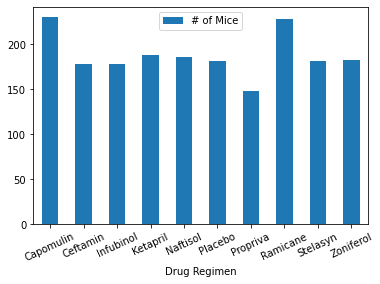

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Regimen_count_df = cleaned_df.groupby("Drug Regimen").count()["Mouse ID"]
Regimen_count_df

df = pd.DataFrame({'Drug Regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], '# of Mice':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df.plot.bar(x='Drug Regimen', y='# of Mice', rot=25)

Text(0, 0.5, 'Count of Mice Used')

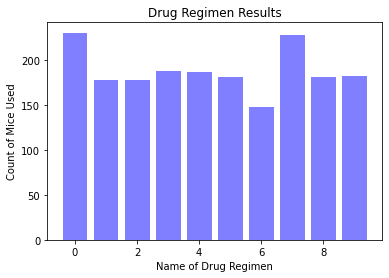

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Regimen_count_df = cleaned_df.groupby("Drug Regimen").count()["Mouse ID"]
Regimen_count_df

users = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(Regimen_count_df))
plt.bar(x_axis, users, color='b', alpha=0.5, align="center")
plt.title("Drug Regimen Results")
plt.xlabel("Name of Drug Regimen")
plt.ylabel("Count of Mice Used")

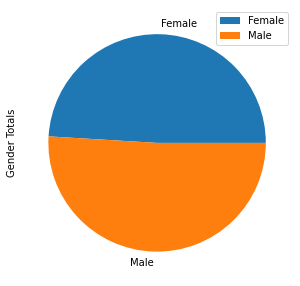

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Count_df = cleaned_df.groupby("Sex").count()["Mouse ID"]
Gender_Count_df

df = pd.DataFrame({'Gender Totals': [922, 958 ]},
                  index=['Female', 'Male'])
plot = df.plot.pie(y='Gender Totals', figsize=(5, 5))

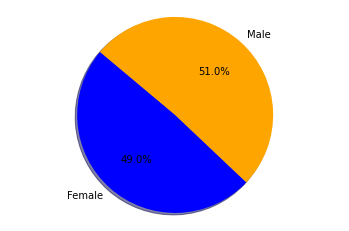

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Count_df = cleaned_df.groupby("Sex").count()["Mouse ID"]
Gender_Count_df

gender = ["Female", "Male"]
gender_totals = [922,958]
colors = ["blue","orange"]

plt.pie(gender_totals, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df  
                                  
                                  
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df 

Capomulin_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]
Capomulin_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


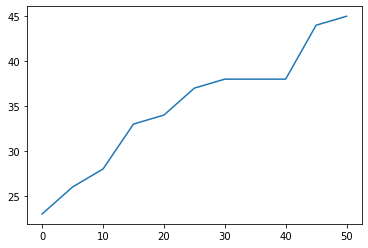

In [42]:
x_axis_data = np.arange(0,55,5)
x_axis_data

points = [23, 26, 28, 33, 34, 37, 38, 38, 38, 44, 45]

plt.plot(x_axis_data, points)
plt.show()


In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
Capomulin_df 

avg_tum_df = Capomulin_df.groupby["Drug Regimen"].mean()["Tumor Volume(mm3)"] 
avg_tum_df

TypeError: 'method' object is not subscriptable

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
